In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# 1. Gather PNG filenames from MPT/resource folder
def gather_png_filenames(root_folder):
    png_files = []
    for root, dirs, files in os.walk(root_folder):
        if os.path.relpath(root, root_folder).count(os.sep) < 2:  # Restrict to two subdirectories
            # print(root)
            for file in files:
                if file.endswith(".png"):
                    png_files.append(os.path.join(root, file))
    return png_files

resource_folder = r'MPT\\resource'

png_files = gather_png_filenames(resource_folder)
print( len(png_files), png_files[0] )

# 2. Load source images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append((path, img))
        else:
            print(f'error : {path}')
    return images

source_images = load_images(png_files)
print(len(source_images), len(source_images[0]), np.array(source_images[3][1]).shape)

74 MPT\\resource\01_block\PuzzleBlue.png
74 2 (86, 86, 4)


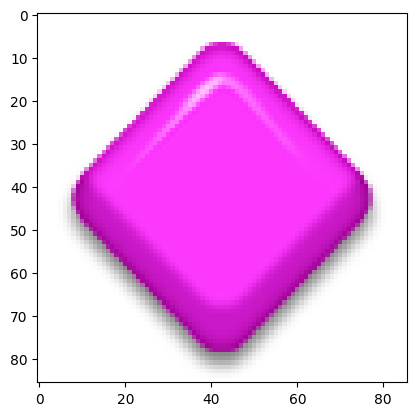

In [2]:
plt.imshow(np.array(source_images[2][1]))

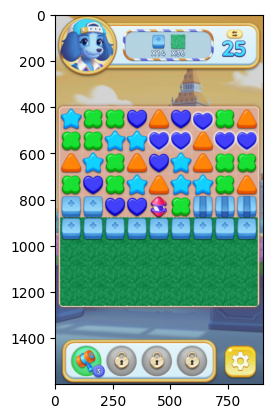

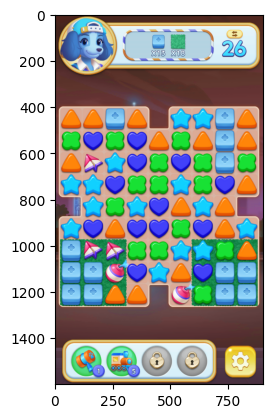

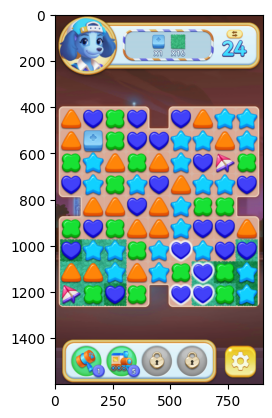

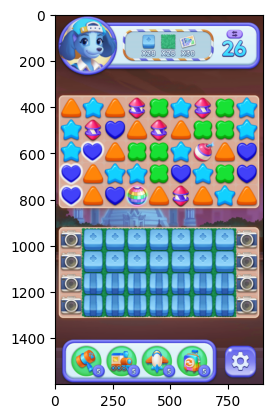

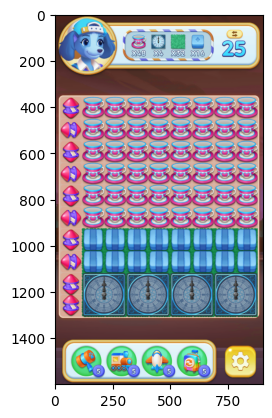

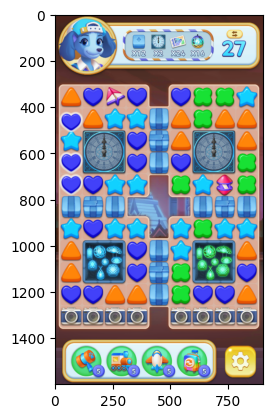

In [3]:
# 3. Load puzzle image
def load_puzzle_image(puzzle_path):
    puzzle_img = cv2.imread(puzzle_path)
    return puzzle_img

game_screen_names=['lv12', 'lv16_ing', 'lv16_ing3', 'lv49_all_items', 'lv50', 'lv171']
game_screen_images = {}
for i in range(len(game_screen_names)):
    game_screen_images[game_screen_names[i]] = load_puzzle_image(rf'MPT\\{game_screen_names[i]}.png')

for k,v in game_screen_images.items():
    plt.imshow(v)
    plt.show()

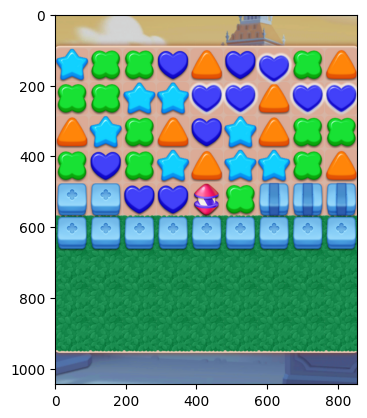

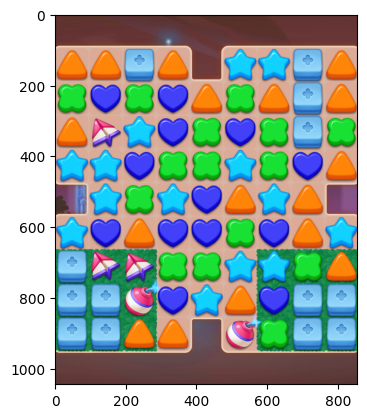

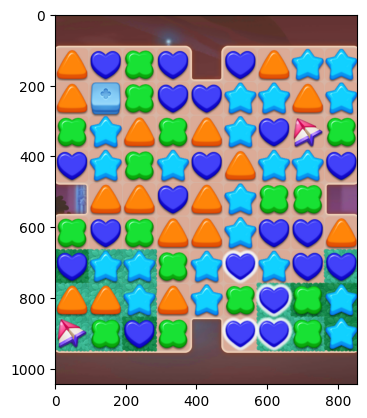

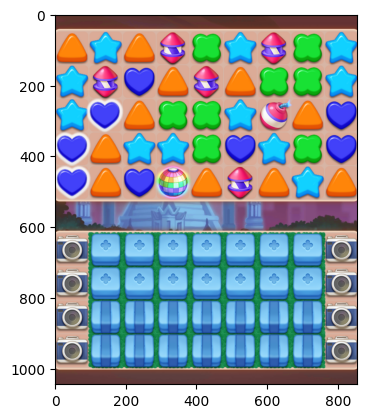

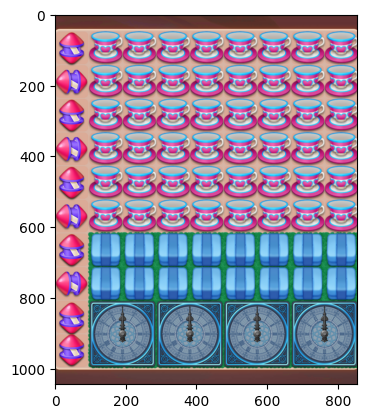

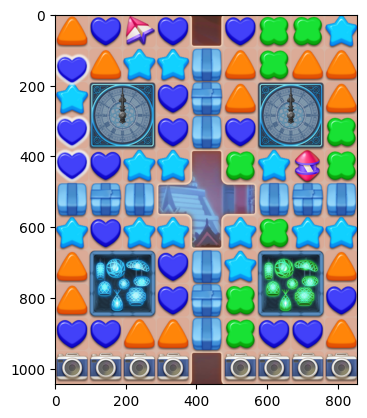

In [4]:
cell_width = 95
cell_height = 95
def cut_board(game_screen, width=900, height=1600, cell_width=cell_width, cell_height=cell_height):
    return game_screen[310:310+cell_height*11,(width - cell_width*9)//2:(width - cell_width*9)//2+cell_width*9, :]

board={}

for screen_name in game_screen_names:
    board[screen_name] = cut_board(game_screen_images[screen_name])
    plt.imshow(board[screen_name])
    plt.show()

In [45]:
board['lv171'].shape

(1045, 855, 3)

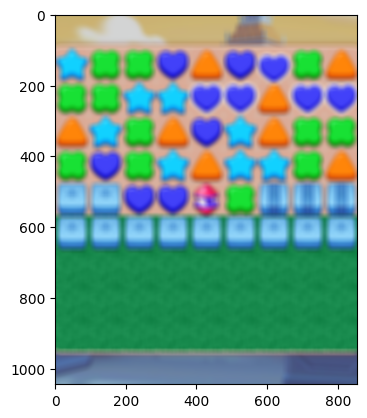

In [5]:
board_blur={}

for screen_name in game_screen_names:
    board_blur[screen_name] = cv2.blur(board[screen_name] , (19,19))

plt.imshow(board_blur['lv12'])

In [26]:
cells = {}
for screen_name in game_screen_names:
    cells[screen_name] = np.array([[board[screen_name][i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells['lv12'].shape

(9, 11, 95, 95, 3)

In [23]:
board_gray = {}
cells_gray = {}
for screen_name in game_screen_names:
    board_gray[screen_name] = cv2.cvtColor(board[screen_name], cv2.COLOR_RGB2GRAY)
    cells_gray[screen_name] = np.array([[board_gray[screen_name][i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells_gray['lv12'].shape

(9, 11, 95, 95)

In [8]:
for screen_name in game_screen_names:
    print(board_blur[screen_name][0,:].std(), board_blur[screen_name][-int(cell_width*0.5),:].std(), board_blur[screen_name][-int(cell_width),:].std(), board_blur[screen_name][-int(cell_width*1.5),:].std(), board_blur[screen_name][-int(cell_width*2),:].std())

35.124228274887656 29.26673479104738 23.356004873413905 46.708386516253654 46.455992133131176
20.938097281908625 16.58211543933665 28.354561357134063 70.60547681938236 51.92584773362326
20.938097281908625 16.58211543933665 32.648852666703384 76.2104867630174 50.29838260171258
20.938097281908625 28.06281570183969 52.51592866500009 51.823614504198225 52.51592866500009
20.938097281908625 19.2845244859257 34.265715667453925 32.16474536566961 32.79516393047611
42.824701098618064 22.91919002287714 29.48835924461438 78.06196470830017 27.729145771098626


In [9]:
for screen_name in game_screen_names:
    print(board_blur[screen_name][0,:].std(), board_blur[screen_name][int(cell_width*0.5),:].std(), board_blur[screen_name][int(cell_width),:].std(), board_blur[screen_name][int(cell_width*1.5),:].std(), board_blur[screen_name][int(cell_width*2),:].std())

35.124228274887656 36.782758095654415 25.33877972001464 80.6313479771083 25.29482864293359
20.938097281908625 21.72322234954966 34.77134126506316 77.22409199460864 29.057834038900026
20.938097281908625 21.72322234954966 36.490876741448645 79.41252239673724 25.403911633717954
20.938097281908625 25.842512359602704 76.86905805377069 28.035279966746494 76.13844923160933
20.938097281908625 15.870051943495499 31.335513485821345 22.196464481171397 34.6505496694497
42.824701098618064 76.09647939733969 26.313130111819707 80.69963753662566 29.26252398303885


In [10]:
for screen_name in game_screen_names:
    print(board[screen_name][-int(cell_width*2),:].std(), board[screen_name][-int(cell_width),:].std(), board[screen_name][-int(cell_width*1.5),:].std(), board[screen_name][-int(cell_width*0.5),:].std())

46.640740127676004 50.26955711755046 47.133860489610264 30.37066607968102
66.05907277370581 63.49319478646438 77.14318199436494 16.754517411234936
56.24536318366945 57.05790922517914 83.43589932308345 16.754517411234936
63.89628396721187 63.89628396721187 63.10158563660159 66.12071238582362
49.24654901816668 48.31468153502963 42.45373527574741 54.71459586363202
38.688983951331394 28.02426911143947 83.87483491406273 48.76466514706808


In [11]:
# 홀짝판단 (9,9,9,10,10,11)
for screen_name in game_screen_names:
    # 2칸 아래, 1칸아래, 1.5칸아래의 가로
    print(board[screen_name][int(cell_width*2),:].std(), board[screen_name][int(cell_width),:].std(), board[screen_name][int(cell_width*1.5),:].std(), board[screen_name][int(cell_width*0.5),:].std())

21.566748953593585 20.1072907845731 86.48266558558973 37.5570671094425
30.99823502230016 40.49640854710156 81.99316575920486 21.774603850625287
21.054605870894907 40.49640854710156 85.66408695749627 21.774603850625287
82.71542373806786 83.5862675588637 25.39585315379496 20.979771256049418
62.92048239414714 60.3131204028842 24.702753501857032 20.979771256049418
33.19284403002308 20.878614075905855 85.77031039808966 83.79633198167029


In [12]:
cells = np.array([[board_gray['lv12'][i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells.shape

(9, 11, 95, 95)

In [13]:
(cells[5][2] - cells[6][1]).mean(), (cells[0][3] - cells[4][1]).mean()

(np.float64(104.90426592797785), np.float64(3.0618282548476454))

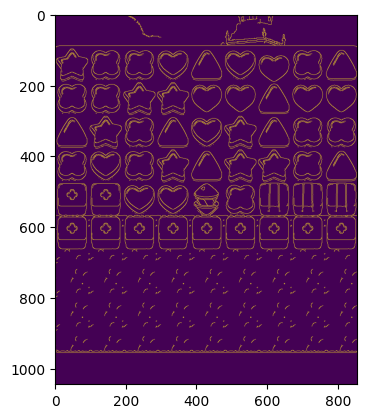

In [20]:
board_canny = {}
for level in board:
    board_canny[level] = cv2.Canny(board[level], 100, 200)
plt.imshow(board_canny['lv12'])

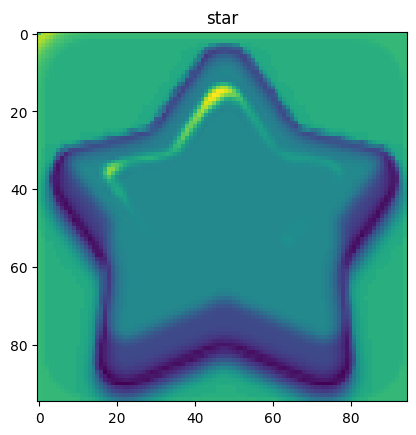

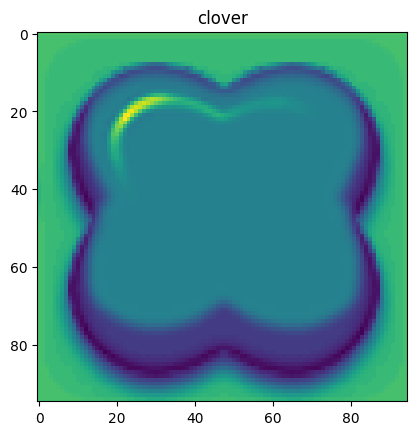

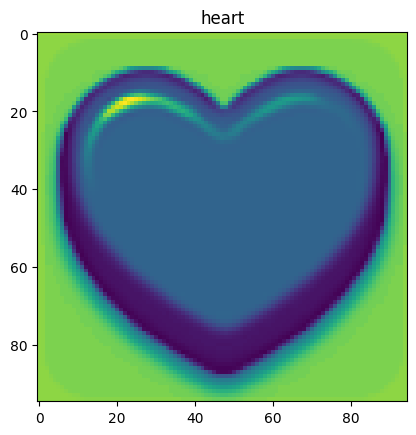

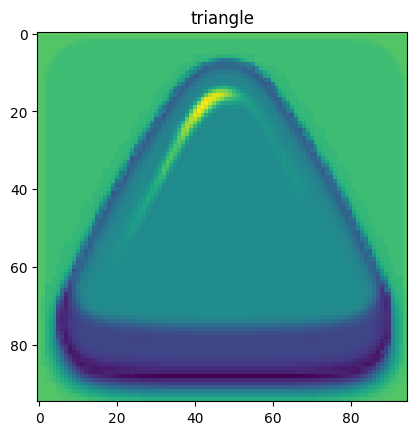

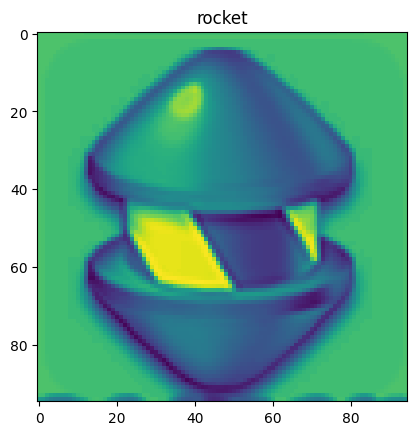

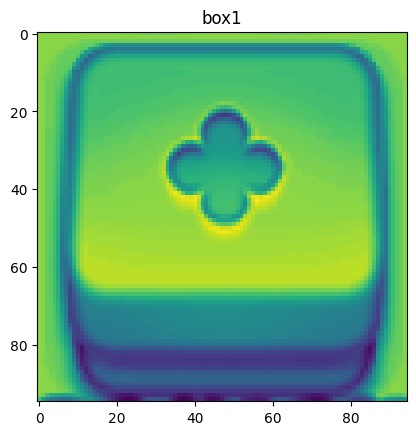

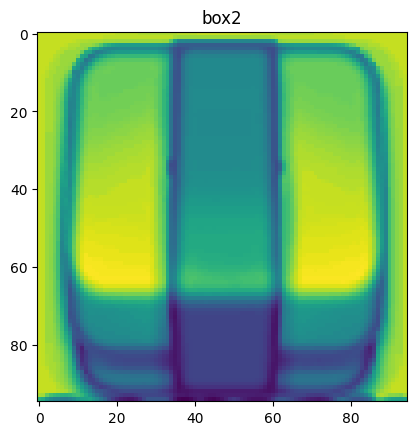

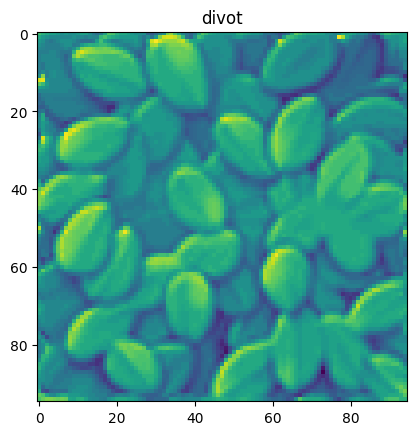

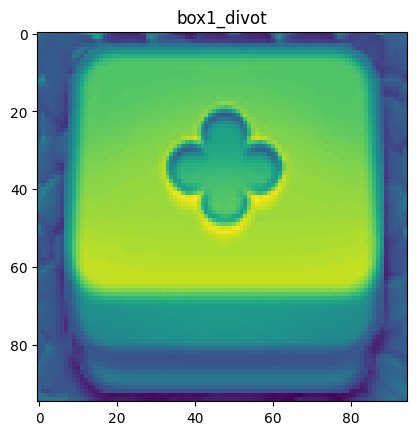

In [48]:
templates = {}
templates['star'] = cells_gray['lv12'][0][1]
templates['clover'] = cells_gray['lv12'][1][1]
templates['heart'] = cells_gray['lv12'][3][1]
templates['triangle'] = cells_gray['lv12'][4][1]
templates['rocket'] = cells_gray['lv12'][4][5]
templates['box1'] = cells_gray['lv12'][0][5]
templates['box2'] = cells_gray['lv12'][7][5]
templates['divot'] = cells_gray['lv12'][1][8]
templates['box1_divot'] = cells_gray['lv12'][1][6]

for k, v in templates.items():
    plt.imshow(v)
    plt.title(k)
    plt.show()

NUmber of match result : 15/15


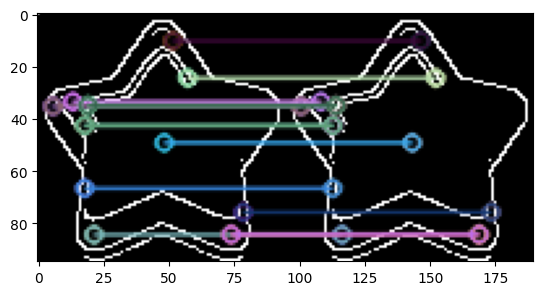

In [16]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[0][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[2][2], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[0][1], keypoints1, cells_canny[2][2], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

NUmber of match result : 7/15


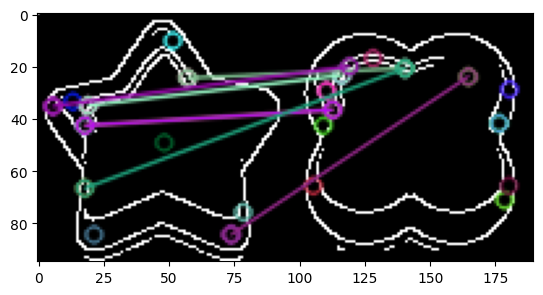

In [55]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[0][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[0][2], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[0][1], keypoints1, cells_canny[0][2], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

NUmber of match result : 8/17


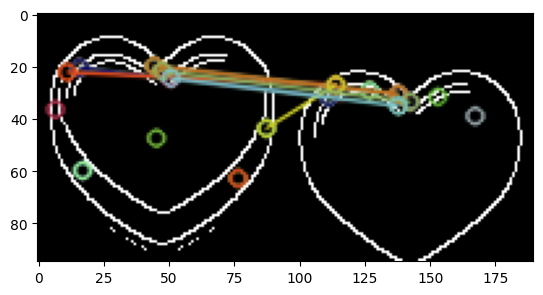

In [20]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[5][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[6][1], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[5][1], keypoints1, cells_canny[6][1], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

In [15]:
# board_gray = cv2.cvtColor(board['lv12'], cv2.COLOR_BGR2GRAY)
# cells_gray = np.array([[board_gray[i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
# cells_gray.shape

(9, 11, 95, 95)

NUmber of match result : 8/26
NUmber of match result : 8/29


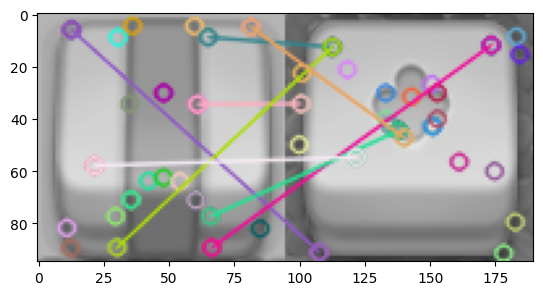

In [16]:
sift = cv2.SIFT_create()
img_1 = cells_gray[7][5]
img_2 = cells_gray[7][6]
keypoints1, descriptors1 = sift.detectAndCompute(img_1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img_2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")
print(f"NUmber of match result : {len(matches)}/{len(descriptors2)}")

plt.imshow(result_image)

NUmber of match result : 22/1211
NUmber of match result : 22/24


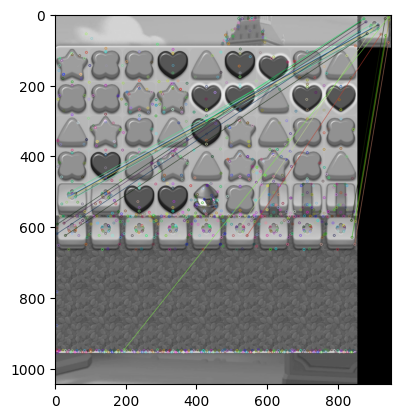

In [24]:
sift = cv2.SIFT_create()
img_1 = board_gray['lv12']#[7][5]
img_2 = cells_gray['lv12'][7][6]
keypoints1, descriptors1 = sift.detectAndCompute(img_1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img_2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")
print(f"NUmber of match result : {len(matches)}/{len(descriptors2)}")

plt.imshow(result_image)

In [82]:
sift = cv2.SIFT_create()
img_1 = cells_gray['lv16_ing3'][0][1]
keypoints1, descriptors1 = sift.detectAndCompute(img_1, None)

match result of 0, 0: 2/2, 2/5, 0.4, 32.23
match result of 0, 1: 2/2, 2/4, 0.5, 17.03
match result of 0, 2: 2/2, 2/4, 0.5, 15.59
match result of 0, 3: 2/2, 2/2, 1.0, 15.79
match result of 0, 4: 2/2, 2/4, 0.5, 3.75
match result of 0, 5: 2/2, 2/6, 0.33, 41.52
match result of 0, 6: 2/2, 2/2, 1.0, 17.55
match result of 0, 7: 2/2, 2/7, 0.29, 19.46
match result of 0, 8: 2/2, 2/2, 1.0, 14.27
match result of 0, 9: 2/2, 2/5, 0.4, 13.23
match result of 0, 10: 2/2, 2/5, 0.4, 28.16
match result of 1, 0: 2/2, 2/6, 0.33, 32.44
match result of 1, 1: 2/2, 2/2, 1.0, 0.0
Descriptors for image 1, 2 are None.
Descriptors for image 1, 3 are None.
Descriptors for image 1, 4 are None.
match result of 1, 5: 2/2, 2/2, 1.0, 15.46
match result of 1, 6: 2/2, 2/2, 1.0, 0.45
match result of 1, 7: 2/2, 2/4, 0.5, 14.35
match result of 1, 8: 2/2, 2/5, 0.4, 14.44
match result of 1, 9: 1/2, 1/2, 0.33, 14.11
match result of 1, 10: 2/2, 2/6, 0.33, 28.07
match result of 2, 0: 2/2, 2/4, 0.5, 32.53
match result of 2, 1: 2/2,

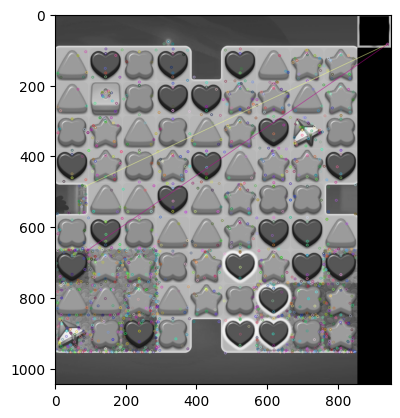

In [41]:
board_name = 'lv16_ing3'
cols, rows, _, _ = cells_gray[board_name].shape
score1 = np.zeros((cols, rows))
score2 = np.zeros((cols, rows))
score3 = np.zeros((cols, rows))

sift = cv2.SIFT_create()
img_1 = cells_gray[board_name][1][1]
img_1_color = cells[board_name][1][1]
keypoints1, descriptors1 = sift.detectAndCompute(img_1, None)


if descriptors1 is None :
    print(f"Descriptors for image {i}, {j} are None.")
    raise Exception("Descriptors for image are None.")



for i in range(cols):
    for j in range(rows):
        img_2 = cells_gray[board_name][i][j]
        img_2_color = cells[board_name][i][j]

        score2[i][j] = round((img_1 - img_2).mean(), 2)
        score3[i][j] = round(np.min(np.mean((img_1_color - img_2_color), axis=(0,1))), 2)


        keypoints2, descriptors2 = sift.detectAndCompute(img_2, None)
        if descriptors2 is None:
            print(f"Descriptors for image {i}, {j} are None.")
            score1[i][j] = 0
            continue 

        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

        # 특징점 매칭
        matches = bf.match(descriptors1, descriptors2)

        score1[i][j] = round(len(matches)/(len(descriptors1)+len(descriptors2)-len(matches)),2)

        print(f"match result of {i}, {j}: {len(matches)}/{len(descriptors1)}, {len(matches)}/{len(descriptors2)}, {score1[i][j]}, {round((img_1 - img_2).mean(), 2)}")

# 시각화
keypoints0, descriptors0 = sift.detectAndCompute(board_gray[board_name], None)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors0, descriptors1)

result_image = cv2.drawMatches(board_gray[board_name], keypoints0, img_1, keypoints1, matches, None)
plt.imshow(result_image)

In [140]:
score2 = np.round(score2 / score2.max(),2)

In [138]:
(score2.T < 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
import pandas as pd
pd.DataFrame(1-score1.T)

,0,1,2,3,4,5,6,7,8
0,0.80,0.70,0.78,0.82,0.71,0.80,0.86,0.80,0.82
1,0.78,0.71,0.78,0.78,0.60,0.78,0.78,1.00,0.71
2,0.78,1.00,0.78,0.71,0.71,0.71,0.71,0.71,1.00
3,0.71,1.00,0.78,0.78,0.78,1.00,0.71,0.78,0.71
4,0.78,1.00,0.78,0.71,0.71,0.71,0.71,0.71,0.71
5,0.70,0.71,0.78,0.71,0.78,0.71,0.71,0.71,0.85
6,0.71,0.71,0.71,0.78,0.78,1.00,0.71,0.71,0.82
7,0.73,0.62,0.67,0.71,0.71,0.78,0.80,1.00,0.50
8,0.71,0.80,0.70,0.71,1.00,0.78,0.75,0.67,0.78
9,0.67,0.88,0.73,0.71,0.73,0.82,0.71,0.67,0.80


In [38]:
pd.DataFrame(score1.T)

,0,1,2,3,4,5,6,7,8
0,0.14,0.00,0.00,0.00,0.00,0.15,0.25,0.00,0.14
1,0.21,1.00,0.78,0.20,0.11,0.20,0.33,0.88,0.11
2,0.78,0.78,0.21,0.21,0.12,0.12,0.20,0.12,0.12
3,0.11,0.21,1.00,0.11,0.20,0.21,0.11,0.78,0.78
4,0.78,0.20,0.78,0.21,0.11,0.21,0.21,1.00,0.11
5,0.21,0.21,0.20,0.20,0.11,0.67,0.13,0.09,0.09
6,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
7,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
pd.DataFrame(score2.T)

,0,1,2,3,4,5,6,7,8
0,166.41,177.86,173.44,167.54,166.04,105.10,166.84,165.36,186.00
1,158.81,0.00,0.98,78.24,158.57,80.69,99.11,5.18,160.09
2,3.23,1.03,155.13,156.91,113.76,113.66,172.36,113.74,113.68
3,160.70,155.13,0.18,158.75,78.89,155.73,157.66,1.62,1.62
4,3.12,78.42,1.03,155.15,157.64,155.27,154.74,0.05,158.62
5,139.16,137.13,77.20,77.33,107.64,1.70,103.84,103.71,103.73
6,153.31,153.59,152.82,152.82,152.96,152.83,153.72,153.72,153.77
7,71.96,72.25,72.25,72.25,72.25,72.25,72.25,72.25,72.30
8,124.49,71.46,71.46,71.46,71.46,71.46,71.46,71.46,71.51
9,71.32,71.55,71.55,71.55,71.55,71.55,71.55,71.55,71.60


In [117]:
score1_arr = score1.reshape(9,-1,1)
score2_arr = score2.reshape(9,-1,1)
np.concatenate((score1_arr, score2_arr), axis=2).shape

(9, 11, 2)

In [125]:
import statistics as st

score_hm = np.zeros((cols,rows))
for i in range(cols):
    for j in range(rows):
        score_hm[i][j] = st.mean([score1[i][j], score2[i][j]])

In [131]:
pd.DataFrame((score2 / score2.max()).T)

,0,1,2,3,4,5,6,7,8
0,0.612514,0.610504,0.611132,0.610378,0.573627,0.614462,0.617540,0.607488,0.605918
1,0.813670,0.000000,0.835406,0.009549,0.677912,0.025380,0.785149,0.814047,0.823659
2,0.804624,0.727039,0.835721,0.000251,0.000063,0.814235,0.814550,0.783704,0.815115
3,0.849981,0.823596,0.785337,0.835658,0.785400,0.815115,0.001256,0.744126,0.836537
4,0.023558,0.815115,0.830758,0.814298,0.000503,0.786280,0.814235,0.814298,0.007099
5,0.996419,0.803744,0.787913,0.001131,0.785400,0.814424,0.833962,0.836537,0.985551
6,0.860975,0.002827,0.835030,0.787850,0.785589,0.815115,0.000377,0.000314,0.799535
7,0.222327,0.830695,0.829752,0.832705,0.828056,0.479332,0.833459,0.006722,0.122000
8,0.825543,0.826611,0.832579,0.784898,0.815115,0.841123,0.438497,0.927252,0.893705
9,0.724149,0.855447,0.228232,0.845961,1.000000,0.493529,0.437681,0.870398,0.894648


In [126]:
pd.DataFrame(score_hm.T)

,0,1,2,3,4,5,6,7,8
0,48.750,48.590,48.640,48.665,45.655,48.905,49.150,48.350,48.225
1,64.830,0.500,66.575,1.260,53.955,2.520,62.560,64.845,65.610
2,64.110,57.950,66.600,0.520,0.505,64.860,64.885,62.445,64.930
3,67.735,65.595,62.575,66.595,62.580,64.930,0.600,59.275,66.665
4,2.375,64.930,66.220,64.865,0.540,62.650,64.860,64.865,1.065
5,79.375,64.040,62.780,0.590,62.580,64.875,66.475,66.665,78.585
6,68.615,0.725,66.550,62.775,62.595,64.930,0.530,0.525,63.705
7,17.790,66.150,66.075,66.335,65.960,38.295,66.385,1.035,9.765
8,65.765,65.830,66.300,62.605,64.930,67.055,35.025,73.850,71.195
9,57.685,68.165,18.250,67.385,79.790,39.425,34.980,69.360,71.265


In [127]:
sorted(score_hm.flatten())#[::-1]

[np.float64(0.5),
 np.float64(0.505),
 np.float64(0.52),
 np.float64(0.525),
 np.float64(0.53),
 np.float64(0.54),
 np.float64(0.59),
 np.float64(0.6),
 np.float64(0.725),
 np.float64(1.0350000000000001),
 np.float64(1.065),
 np.float64(1.26),
 np.float64(2.375),
 np.float64(2.52),
 np.float64(9.765),
 np.float64(17.79),
 np.float64(18.25),
 np.float64(34.980000000000004),
 np.float64(35.025),
 np.float64(38.295),
 np.float64(39.425000000000004),
 np.float64(45.455),
 np.float64(45.655),
 np.float64(47.7),
 np.float64(47.79),
 np.float64(47.81),
 np.float64(47.815),
 np.float64(48.03),
 np.float64(48.145),
 np.float64(48.225),
 np.float64(48.35),
 np.float64(48.59),
 np.float64(48.64),
 np.float64(48.665),
 np.float64(48.7),
 np.float64(48.75),
 np.float64(48.905),
 np.float64(49.15),
 np.float64(49.275),
 np.float64(53.955),
 np.float64(57.684999999999995),
 np.float64(57.95),
 np.float64(59.275),
 np.float64(62.445),
 np.float64(62.56),
 np.float64(62.575),
 np.float64(62.58),
 np.fl

In [40]:
pd.DataFrame(score3.T)

,0,1,2,3,4,5,6,7,8
0,78.57,76.48,76.93,78.80,78.62,99.26,91.64,78.75,78.50
1,66.06,0.00,0.97,80.87,50.56,83.63,87.28,3.46,51.82
2,1.16,1.00,62.57,64.64,103.73,103.61,55.42,103.71,103.64
3,50.58,62.57,0.15,50.74,81.67,63.05,49.64,0.97,0.97
4,1.02,81.02,1.00,62.58,49.60,62.70,62.29,0.02,50.58
5,56.21,54.18,79.73,79.85,95.76,1.36,62.54,62.42,62.44
6,60.78,60.91,59.92,59.92,60.10,59.93,61.09,61.09,61.14
7,74.58,74.71,74.71,74.71,74.71,74.71,74.71,74.71,74.77
8,62.37,73.60,73.60,73.60,73.60,73.60,73.60,73.60,73.66
9,73.67,73.71,73.71,73.71,73.71,73.71,73.71,73.71,73.77


In [149]:
(score3.T < 20).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

match result of 0, 0: 2/6, 2/5, 0.22, 14.86
match result of 0, 1: 2/6, 2/4, 0.25, 42.04
match result of 0, 2: 2/6, 2/4, 0.25, 42.19
match result of 0, 3: 2/6, 2/2, 0.33, 40.97
match result of 0, 4: 2/6, 2/4, 0.25, 39.84
match result of 0, 5: 3/6, 3/6, 0.33, 28.46
match result of 0, 6: 2/6, 2/2, 0.33, 41.36
match result of 0, 7: 4/6, 4/7, 0.44, 10.09
match result of 0, 8: 1/6, 1/2, 0.14, 48.43
match result of 0, 9: 4/6, 4/5, 0.57, 51.37
match result of 0, 10: 3/6, 3/5, 0.38, 15.55
match result of 1, 0: 2/6, 2/6, 0.2, 15.0
match result of 1, 1: 2/6, 2/2, 0.33, 39.87
Descriptors for image 1, 2 are None.
Descriptors for image 1, 3 are None.
Descriptors for image 1, 4 are None.
match result of 1, 5: 2/6, 2/2, 0.33, 42.3
match result of 1, 6: 2/6, 2/2, 0.33, 40.29
match result of 1, 7: 3/6, 3/4, 0.43, 46.61
match result of 1, 8: 3/6, 3/5, 0.38, 47.61
match result of 1, 9: 2/6, 2/2, 0.33, 49.78
match result of 1, 10: 3/6, 3/6, 0.33, 15.63
match result of 2, 0: 2/6, 2/4, 0.25, 15.07
match resu

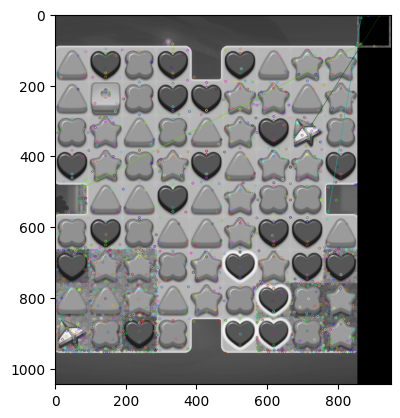

In [27]:
board_name = 'lv16_ing3'
cols, rows, _, _ = cells_gray[board_name].shape
score1 = np.zeros((cols, rows))
score2 = np.zeros((cols, rows))
score3 = np.zeros((cols, rows))

sift = cv2.SIFT_create()
img_1 = cells_gray['lv12'][0][8]
img_1_color = cells['lv12'][0][8]
img_1[6:89, 6:89] = 0
img_1_color[6:89, 6:89] = 0
keypoints1, descriptors1 = sift.detectAndCompute(img_1, None)


if descriptors1 is None :
    print(f"Descriptors for image {i}, {j} are None.")
    raise Exception("Descriptors for image are None.")



for i in range(cols):
    for j in range(rows):
        img_2 = cells_gray[board_name][i][j]
        img_2[6:89, 6:89] = 0
        img_2_color = cells[board_name][i][j]
        img_2_color[6:89, 6:89] = 0

        score2[i][j] = round((img_1 - img_2).mean(), 2)
        score3[i][j] = round(np.min(np.mean((img_1_color - img_2_color), axis=(0,1))), 2)


        keypoints2, descriptors2 = sift.detectAndCompute(img_2, None)
        if descriptors2 is None:
            print(f"Descriptors for image {i}, {j} are None.")
            score1[i][j] = 0
            continue 

        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

        # 특징점 매칭
        matches = bf.match(descriptors1, descriptors2)

        score1[i][j] = round(len(matches)/(len(descriptors1)+len(descriptors2)-len(matches)),2)

        print(f"match result of {i}, {j}: {len(matches)}/{len(descriptors1)}, {len(matches)}/{len(descriptors2)}, {score1[i][j]}, {round((img_1 - img_2).mean(), 2)}")

# 시각화
keypoints0, descriptors0 = sift.detectAndCompute(board_gray[board_name], None)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors0, descriptors1)

result_image = cv2.drawMatches(board_gray[board_name], keypoints0, img_1, keypoints1, matches, None)
plt.imshow(result_image)

In [29]:
import pandas as pd
pd.DataFrame(score3.T)

,0,1,2,3,4,5,6,7,8
0,15.06,14.99,15.72,16.29,8.70,15.49,15.59,15.07,14.49
1,18.13,16.75,16.71,16.69,19.60,16.67,18.22,18.36,18.31
2,18.27,26.53,16.73,16.76,16.76,18.37,18.43,18.44,18.54
3,16.77,20.14,18.26,16.71,18.23,18.54,16.96,15.77,16.89
4,16.73,18.54,16.79,18.38,16.83,18.41,18.37,18.38,16.77
5,19.88,18.41,18.24,16.94,18.23,18.41,16.92,16.89,17.78
6,17.87,17.85,17.78,18.23,18.28,18.54,16.80,16.78,19.17
7,8.81,45.18,45.36,18.69,18.57,13.68,19.13,19.23,46.49
8,46.78,46.47,45.32,20.17,18.54,17.50,38.02,11.26,4.00
9,45.78,46.59,3.73,18.27,19.63,14.14,37.53,45.95,2.00


In [ ]:
"""
lv12 - 0,1
possible threshold
score1:  0.32 ~ 0.88
score2: 4.65 ~ 57.59

lv12 - 하트(강조포함)
score1: 0.25~0.4
score2: 90.29 ~ 109.57

lv12 클로버
score1: 0.33 ~ 0.67
score2: 5.18 ~ 71.17

lv12 박스
score1: 0.35 ~ 0.62
score2: 17.64 ~ 29.25

"""


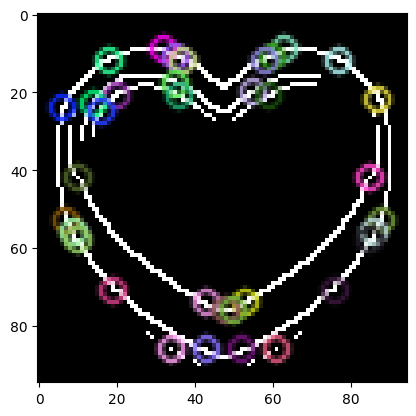

In [18]:
# FASt 특징 검출기 생성
fast = cv2.FastFeatureDetector_create(50)
# 특징점 검출
keypoints = fast.detect(cells_canny[5][1], None)
# 특징점 그리기
img = cv2.drawKeypoints(cells_canny[5][1], keypoints, None)
# 결과 출력
plt.imshow(img)

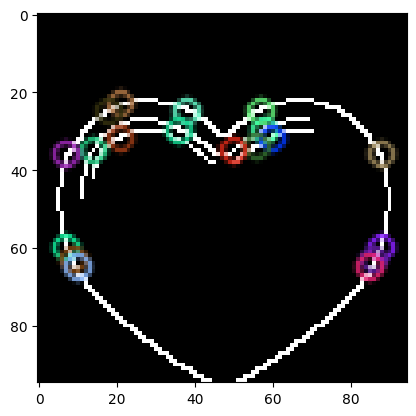

In [19]:
# FASt 특징 검출기 생성
fast = cv2.FastFeatureDetector_create(50)
# 특징점 검출
keypoints = fast.detect(cells_canny[6][1], None)
# 특징점 그리기
img = cv2.drawKeypoints(cells_canny[6][1], keypoints, None)
# 결과 출력
plt.imshow(img)

NUmber of match result : 8/17


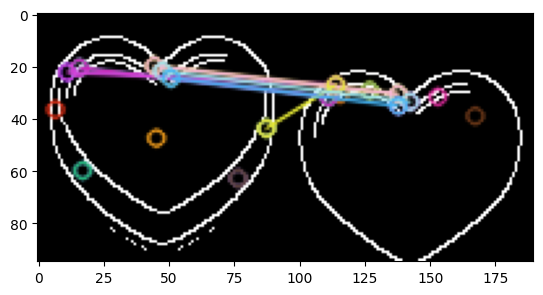

In [52]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(cells_canny[5][1], None)
keypoints2, descriptors2 = sift.detectAndCompute(cells_canny[6][1], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[5][1], keypoints1, cells_canny[6][1], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

In [49]:
len(matches)

0

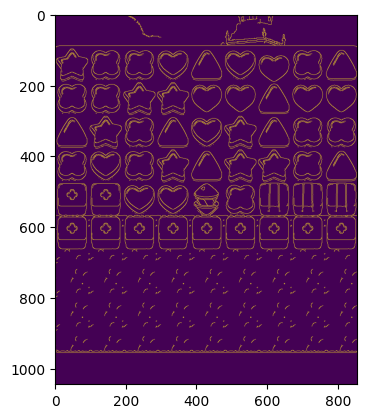

In [45]:
board_binary = (board_canny > 0).astype(bool)
plt.imshow(board_binary)

In [48]:
cells_binary = np.array([[board_binary[i:i+cell_height, j:j+cell_width] for i in range(0, cell_height*11, cell_height)]  for j in range(0, cell_width*9, cell_width)])
cells_binary.shape

(9, 11, 95, 95)

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
(cells_binary[0][1] == cells_binary[2][2]).sum() / (cells_binary[5][1].sum() + cells_binary[6][5].sum())

np.float64(6.206327372764787)

In [50]:
(cells_binary[0][1] == cells_binary[0][2]).sum() / (cells_binary[5][1].sum() + cells_binary[6][5].sum())

np.float64(5.37414030261348)

In [28]:
cells[5][1].shape

(95, 95, 4)

In [41]:
np.median(cells[5][1],axis=(0,1))

array([ 66.,  65., 195., 255.])

In [46]:
np.median(cells[5][2],axis=(0,1))

array([104., 102., 217., 255.])

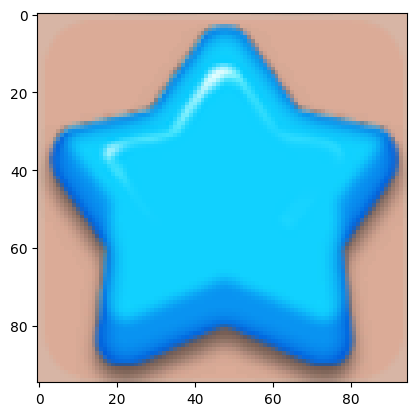

In [44]:
plt.imshow(cells[1][3])

In [22]:
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)
keypoints1, descriptors1 = surf.detectAndCompute(cells_canny[0][1], None)
keypoints2, descriptors2 = surf.detectAndCompute(cells_canny[2][2], None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 특징점 매칭
matches = bf.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 매칭 결과 시각화
result_image = cv2.drawMatches(cells_canny[0][1], keypoints1, cells_canny[2][2], keypoints2, matches, None)

print(f"NUmber of match result : {len(matches)}/{len(descriptors1)}")


plt.imshow(result_image)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

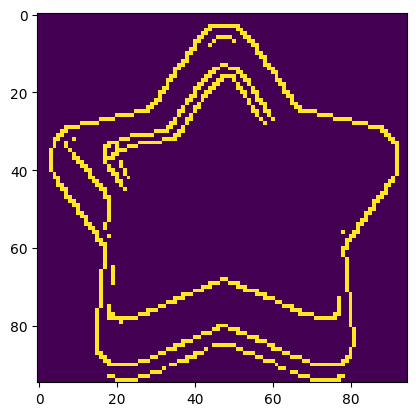

In [71]:
cv2.matchTemplate(cells_canny[0][1], cells_canny[0][1], cv2.TM_CCOEFF_NORMED)

In [60]:
edges.shape

(95, 95)

In [66]:
import pandas as pd
((edges == 0) + (edges == 255)).sum()

np.int64(9025)

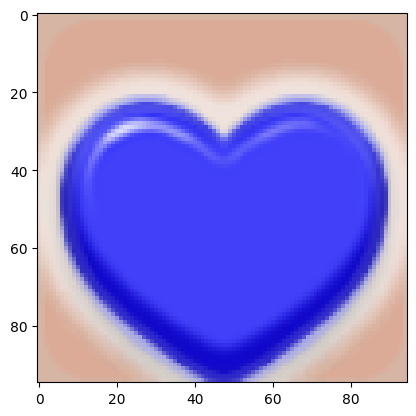

In [46]:
plt.imshow(cells[6][1])

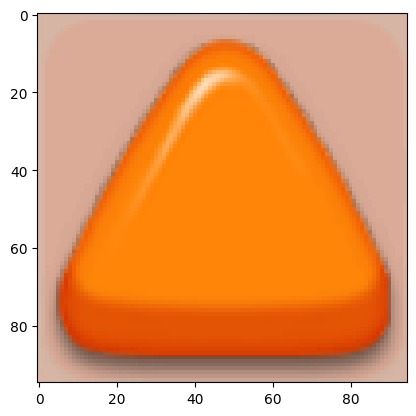

In [33]:
plt.imshow(cells[0][3])

In [ ]:
cell_from_images = []
